# Data Imputation - Age

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/train.csv")
dfX = df.drop('Survived', axis=1)
dfy = df.Survived

In [2]:
import sys
sys.path.append("../")
from titansurv.plotting import plot_missprop

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

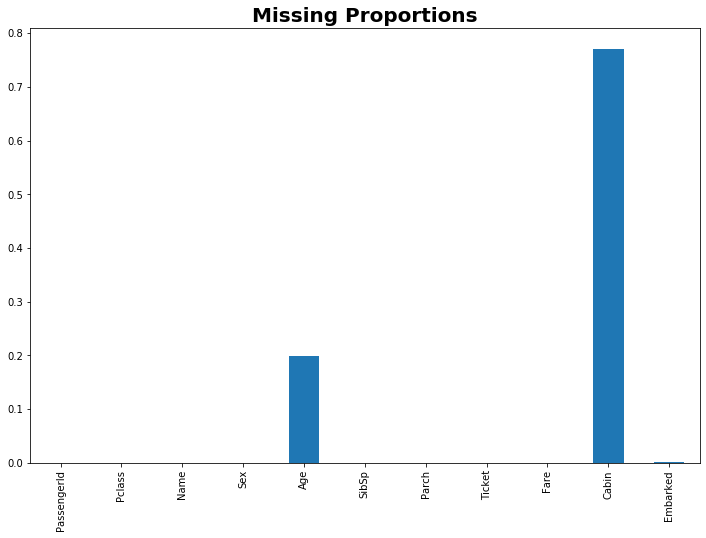

In [3]:
plot_missprop(dfX)

In [4]:
from titansurv.prepare import drop_NA_Embarked

In [5]:
from sklearn.impute import KNNImputer

In [6]:
from titansurv.pipeline import pipeline1 as dp
from titansurv.utils import print_params

../titansurv/pipeline/data_pipeline.py:41: UserWarning: Please set the data first using set_data method!
  warnings.warn('Please set the data first using set_data method!')


## Imputation strategy for Age
### Treating it as a regression problem i.e. predict missing values 

1. Dr

In [7]:
dp.get_description(markdown=True)

The following were the preprocessing steps used: 
1. **Embarked**: Dropped NA rows and applied OneHotEncoding
2. **Age** : Applied Mean Imputation and Mean Normalization
3. **Fare**: Mean Normalization
4. **Sex**: OneHotEncoding
5. **Name**: Categorised into ['Mr', 'Mrs', 'Miss', 'Master', 'Special']<br/> 
    5.1 Rename [Mlle, Ms] -> Miss      
    5.2 Rename [Mme] -> Mrs     
    5.3 Put the Rest -> Special     
    Then performed OneHotEncoding
6. **Ticket** categorized into [1: numeric, 0: else] <br/>
    6.1 Remove special characters but not space <br/>
    6.2 Replace numeric strings by 'numeric' <br/>
    6.3 Split on space and keep the first item <br/>
 Then applied binarizer for [1: numeric, 0: else]
7. **SibSp** binned into [0, 1, >1] and applied OneHotEncoding
8. **Parch** binned into [0, 1, >1] and applied OneHotEncoding

Tuned ML model: **RandomForestClassifier** using GridSearchCV

In [8]:
dp.set_data(df)

In [9]:
print_params(dp)

['data',
 'description',
 'mlmodel__bootstrap',
 'mlmodel__ccp_alpha',
 'mlmodel__class_weight',
 'mlmodel__criterion',
 'mlmodel__max_depth',
 'mlmodel__max_features',
 'mlmodel__max_leaf_nodes',
 'mlmodel__max_samples',
 'mlmodel__min_impurity_decrease',
 'mlmodel__min_impurity_split',
 'mlmodel__min_samples_leaf',
 'mlmodel__min_samples_split',
 'mlmodel__min_weight_fraction_leaf',
 'mlmodel__n_estimators',
 'mlmodel__n_jobs',
 'mlmodel__oob_score',
 'mlmodel__random_state',
 'mlmodel__verbose',
 'mlmodel__warm_start',
 'mlmodel',
 'prepare_data__memory',
 'prepare_data__steps',
 'prepare_data__verbose',
 'prepare_data__nan_drpr',
 'prepare_data__nan_drpr__key',
 'prepare_data',
 'preprocess_data__n_jobs',
 'preprocess_data__remainder',
 'preprocess_data__sparse_threshold',
 'preprocess_data__transformer_weights',
 'preprocess_data__transformers',
 'preprocess_data__verbose',
 'preprocess_data__enc',
 'preprocess_data__imp_scaler',
 'preprocess_data__scaler',
 'preprocess_data__pre_

In [10]:
dfX, dfy = dp.prepare()

In [11]:
pipe = dp.get_pipeline()

In [12]:
pipe.get_params()['preprocessing__imp_scaler__imp']

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [13]:
print_params(pipe)

['memory',
 'steps',
 'verbose',
 'preprocessing',
 'train',
 'preprocessing__n_jobs',
 'preprocessing__remainder',
 'preprocessing__sparse_threshold',
 'preprocessing__transformer_weights',
 'preprocessing__transformers',
 'preprocessing__verbose',
 'preprocessing__enc',
 'preprocessing__imp_scaler',
 'preprocessing__scaler',
 'preprocessing__pre_Name',
 'preprocessing__pre_Cabin',
 'preprocessing__pre_Ticket',
 'preprocessing__Pre_SibSp',
 'preprocessing__Pre_Parch',
 'preprocessing__enc__categories',
 'preprocessing__enc__drop',
 'preprocessing__enc__dtype',
 'preprocessing__enc__handle_unknown',
 'preprocessing__enc__sparse',
 'preprocessing__imp_scaler__memory',
 'preprocessing__imp_scaler__steps',
 'preprocessing__imp_scaler__verbose',
 'preprocessing__imp_scaler__imp',
 'preprocessing__imp_scaler__scaler',
 'preprocessing__imp_scaler__imp__add_indicator',
 'preprocessing__imp_scaler__imp__copy',
 'preprocessing__imp_scaler__imp__fill_value',
 'preprocessing__imp_scaler__imp__mis

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [52]:
param_grid = {'preprocessing__imp_scaler__imp': [SimpleImputer()],
#               'preprocessing__imp_scaler__imp__n_neighbors': range(3, 15, 2),
              'train': [RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)]}

In [53]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(dfX, dfy)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('enc',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop='first',
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                            

In [54]:
grid.best_params_

{'preprocessing__imp_scaler__imp': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'train': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)}

In [55]:
grid.best_score_

0.8088046721259442

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
ohe = OneHotEncoder(drop='first')

In [68]:
ohe.fit_transform(df.Sex.values.reshape(-1, 1))

<891x1 sparse matrix of type '<class 'numpy.float64'>'
	with 577 stored elements in Compressed Sparse Row format>

In [69]:
ohe.get_feature_names()

array(['x0_male'], dtype=object)